In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
temps = xr.open_dataset('TREFHTMN_TREFHTMX_71N156W_B20TRC5CNBDRD.f09_g16.002.cam.h1 (1).19200101-20051231')

In [4]:
temps 

<xarray.Dataset>
Dimensions:   (time: 31390)
Coordinates:
    lat       float64 ...
    lon       float64 ...
  * time      (time) object 1920-01-01 00:00:00 ... 2005-12-31 00:00:00
Data variables:
    TREFHTMN  (time) float32 ...
    TREFHTMX  (time) float32 ...
Attributes:
    Description:  Minimum and maximum daily reference height temperature at 7...

In [5]:
tmin = temps.TREFHTMN
tmax = temps.TREFHTMX

In [6]:
gs_min = tmin.groupby('time.dayofyear')
gs_max = tmax.groupby('time.dayofyear')

In [9]:
spr=tmin.sel(time=tmin['time.season']=='MAM')

In [7]:
%%time
# 15 day rolling window for daily MIN temps 
min90_pct = []
# temp_placeholder_min = []

# start in spring (march 1)
for i in range(60,152): #windows -- center days
    temp_placeholder_min = []
    for key in range(i-7,i+8): #days in window
        values_min=gs_min[key]
        temp_placeholder_min.extend(values_min) #append entire list of years of day
    min90_pct.append(np.percentile(temp_placeholder_min, 90))
    

CPU times: user 36.7 s, sys: 459 ms, total: 37.2 s
Wall time: 41.2 s


In [11]:
hwd_min=[] # the length (in days) of the longest yearly event
hwn_min=[] # yearly number of heat waves 
hwf_min=[] # sum of participating heat wave days per year 
for year in range(1920,2006):
    spryear_min = spr.sel(time=(spr['time.year']==year))
    #print("length of year values: ", len(spryear))
    above_90_pct_bool_list_min = spryear_min > min90_pct
    #print("len of true and false bool array: ", len(above_90_pct_bool_list))
    diffs_min = np.diff(above_90_pct_bool_list_min.astype(int))
    #print(diffs)
    starts_in_loop_min = np.where(diffs_min==1)[0] # gives the indices where our starts are
    #print("start indices: ", starts_in_loop_min)
    ends_in_loop_min = np.where(diffs_min==-1)[0]
    #print("end indices: ", ends_in_loop)
    #missing end
    if len(starts_in_loop_min) > len(ends_in_loop_min):
        starts_in_loop_min = starts_in_loop_min[0:-1]
    #missing start
    elif len(ends_in_loop_min) > len(starts_in_loop_min):
        ends_in_loop_min = ends_in_loop_min[1:]
    #missing start and missing end
    elif ((ends_in_loop_min-starts_in_loop_min)<0).any():
        starts_in_loop_min = starts_in_loop_min[:-1]
        ends_in_loop_min = ends_in_loop_min[1:]
    num_consecutive_hot_days_in_loop_min = ends_in_loop_min-starts_in_loop_min
    if len(num_consecutive_hot_days_in_loop_min) == 0:
        num_consecutive_hot_days_in_loop_min = np.array([0])
    #print("num of consecutive hot days: ", num_consecutive_hot_days_in_loop, "\n")
    hwn_min.append(np.sum(num_consecutive_hot_days_in_loop_min>=3))
    heat_wave_durations_min = np.where(num_consecutive_hot_days_in_loop_min>=3, num_consecutive_hot_days_in_loop_min, 0)
    hwf_min.append(np.sum(heat_wave_durations_min))
    hwd_min.append(heat_wave_durations_min.max())

/var/folders/zx/shncch5556dgfcgkck0jvqqh0000gn/T/ipykernel_95584/989740968.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "file" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('utqiagvik_spr_hw', file='jpeg');


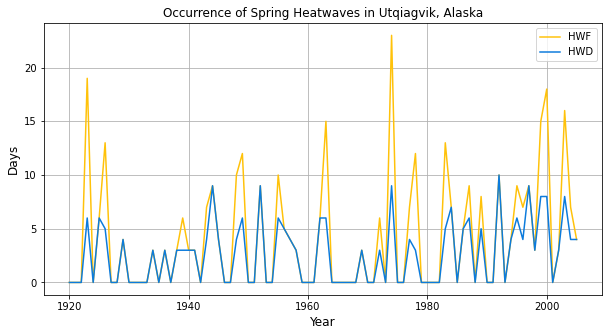

In [44]:
plt.figure(figsize=(10,5))
#plt.plot(range(1920,2006),hwn_min, color='blue', label='HWN') 
plt.plot(range(1920,2006),hwf_min, color='#FFC20A', label='HWF') 
plt.plot(range(1920,2006),hwd_min, color='#0C7BDC', label='HWD') 
font = {'family': 'Sans',
        'color': 'black', 
        'weight': 'normal', 
        'size': 12,
       }
plt.title('Occurrence of Spring Heatwaves in Utqiagvik, Alaska', fontdict=font)
plt.xlabel('Year', fontdict=font)
plt.ylabel('Days', fontdict=font)
plt.grid()
plt.legend();
plt.savefig('utqiagvik_spr_hw', file='jpeg');
#plt.savefig('utqiagvik_min_metrics', file='jpeg')
#plt.xlim(1980,2000)

In [13]:
%%time
# 15 day rolling window for daily MAX temps 
max90_pct = []

# start in spring (march 1)
for i in range(60,152): #windows -- center days
    temp_placeholder_max = []
    for key in range(i-7,i+8): #days in window
        values_max=gs_max[key]
        temp_placeholder_max.extend(values_max) #append entire list of years of day
    max90_pct.append(np.percentile(temp_placeholder_max, 90))
    

CPU times: user 32.3 s, sys: 107 ms, total: 32.4 s
Wall time: 32.6 s


In [20]:
hwd_max=[] # the length (in days) of the longest yearly event
hwn_max=[] # yearly number of heat waves 
hwf_max=[] # sum of participating heat wave days per year 
for year in range(1920,2006):
    spryear_max = spr.sel(time=(spr['time.year']==year))
    #print("length of year values: ", len(spryear))
    above_90_pct_bool_list_max = spryear_max > max90_pct
    #print("len of true and false bool array: ", len(above_90_pct_bool_list))
    diffs_max = np.diff(above_90_pct_bool_list_max.astype(int))
    #print(diffs)
    starts_in_loop_max = np.where(diffs_max==1)[0] # gives the indices where our starts are
    #print("start indices: ", starts_in_loop_min)
    ends_in_loop_max = np.where(diffs_max==-1)[0]
    #print("end indices: ", ends_in_loop)
    #missing end
    if len(starts_in_loop_max) > len(ends_in_loop_max):
        starts_in_loop_max = starts_in_loop_max[0:-1]
    #missing start
    elif len(ends_in_loop_max) > len(starts_in_loop_max):
        ends_in_loop_max = ends_in_loop_max[1:]
    #missing start and missing end
    elif ((ends_in_loop_max-starts_in_loop_max)<0).any():
        starts_in_loop_max = starts_in_loop_max[:-1]
        ends_in_loop_max = ends_in_loop_max[1:]
    num_consecutive_hot_days_in_loop_max = ends_in_loop_max-starts_in_loop_max
    if len(num_consecutive_hot_days_in_loop_max) == 0:
        num_consecutive_hot_days_in_loop_max = np.array([0])
    #print("num of consecutive hot days: ", num_consecutive_hot_days_in_loop, "\n")
    hwn_max.append(np.sum(num_consecutive_hot_days_in_loop_max>=3))
    heat_wave_durations_max = np.where(num_consecutive_hot_days_in_loop_max>=3, num_consecutive_hot_days_in_loop_max, 0)
    hwf_max.append(np.sum(heat_wave_durations_max))
    hwd_max.append(heat_wave_durations_max.max())

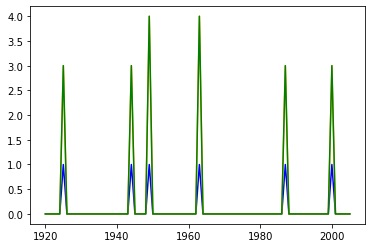

In [24]:
plt.plot(range(1920,2006),hwn_max, color='blue') #blue
plt.plot(range(1920,2006),hwf_max, color='orange') #orange
plt.plot(range(1920,2006),hwd_max, color='green'); #green
#plt.xlim(1980,2000)

#### The sum of participating heat wave days (HWF) is being covered by maximum number of heat wave days (HWD). This makes sense because we only have one heat wave in those years, so if there's only one heat wave the number of heat wave days will be the same as the maximum number of heat wave days!


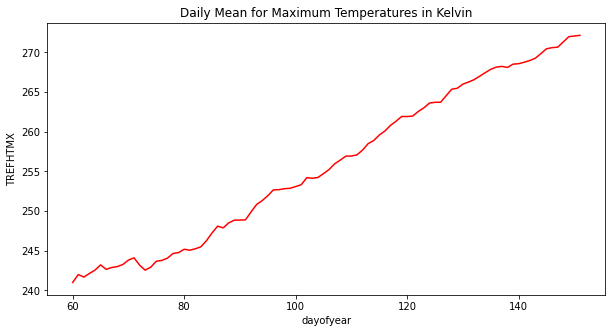

In [47]:
tmaxday= tmax.sel(time=tmax['time.season']=='MAM').groupby('time.dayofyear').mean(dim='time').plot(figsize=(10,5), color='red')
plt.title('Daily Mean for Maximum Temperatures in Kelvin');